# First Neurons

In [17]:
import numpy as np
import tensorflow as tf

** Data Setup **

Setting Up some Random Data for Demonstration Purposes

In [18]:
# TO CONFIRM SAME RANDOM NUMBERS (EXECUTE SEED IN SAME CELL!) 
np.random.seed(101)
tf.set_random_seed(101)

rand_a = np.random.uniform(0,100,(5,5))  #5*5 matrix filled with random values between 0 to 100 from uniform distribution
rand_b = np.random.uniform(0,100,(5,1))  #5*1 matrix filled with random values between 0 to 100 from uniform distribution

print(rand_a)
print('\n')
print(rand_b)

[[51.63986277 57.06675869  2.84742265 17.15216562 68.52769817]
 [83.38968626 30.69662197 89.36130797 72.15438618 18.99389542]
 [55.42275911 35.2131954  18.18924027 78.56017619 96.54832224]
 [23.23536618  8.35614337 60.35484223 72.89927573 27.62388285]
 [68.53063288 51.78674742  4.84845374 13.78692376 18.69674261]]


[[99.43179012]
 [52.06653967]
 [57.87895355]
 [73.48190583]
 [54.19617722]]


### Placeholders

In [19]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [20]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)

### Running Sessions  to create Graphs with Feed Dictionaries

In [21]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


________________________

________________________

## Example Neural Network

In [22]:
n_features = 10     #input features
n_dense_neurons = 3  #no. of neuron in a dense layer

In [24]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))
#data type is float32
#shape is (None,n_features) ie. (no. of sample * n_features) ie. rows=no. of sample, column=n_features  

In [26]:
# Variables for w and b

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
#weights are distributed as per random normal distribution.
#shape = n_features * n_dense_neurons 
#no. of columns of x must match with no. of rows of W for matrix multiplication. 

b = tf.Variable(tf.zeros([n_dense_neurons]))

** Operation Activation Function **

In [27]:
xW = tf.matmul(x,W)

In [28]:
z = tf.add(xW,b)

In [29]:
# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

<img src="Graph.JPG">

** Variable Intializer! **

In [33]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [35]:
print(layer_out)

[[0.11823359 0.6307773  0.4197328 ]]


## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [62]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data    #x_data is linearly spaced from 0 to 10 and a little noise is added to it.

array([-1.46027697,  2.13776935,  1.87703546,  3.48833087,  5.07605886,
        6.08139211,  7.25036066,  7.30514808,  8.62606058,  9.2193729 ])

In [63]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label    #y_label is linearly spaced from 0 to 10 and a little noise is added to it.

array([1.40650793, 0.47678213, 1.16415706, 2.22135465, 5.7766126 ,
       5.10985835, 7.36736951, 9.01944636, 9.49185137, 9.66559382])

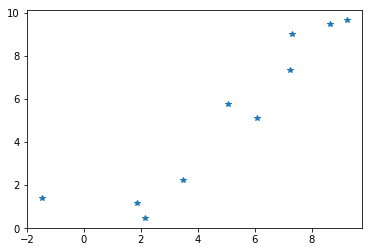

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_data,y_label,'*')

** Variables **

In [74]:
np.random.rand(2)   #value of m and b will be initialised using the resulting two random values.

array([0.23846439, 0.82377373])

y = mx + b

In [75]:
m = tf.Variable(0.23846439)   #random value of m is initialised as per above generated random numbers
b = tf.Variable(0.82377373)   #random value of b is initialised as per above generated random numbers

### Cost Function

In [76]:
error = 0

for x,y in zip(x_data,y_label):    #Zip will make list of tuples
    
    y_hat = m*x + b  #Our predicted value for evey x_data & y_label
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


### Optimizer

In [77]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [78]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [79]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100   #no. of training steps
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [80]:
final_slope

0.93624073

In [81]:
final_intercept

0.6311006

### Evaluate Results

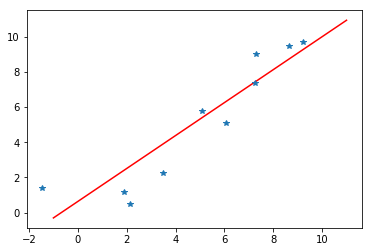

In [83]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'red')

plt.plot(x_data,y_label,'*')